# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [130]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [131]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [132]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [133]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [134]:
# Find the table with the correct class
table = soup.find('table', class_='table')
# Create a list to store the data
data = []

# Check if the table was found
if table is not None:
    # Extract all rows of data
    rows = table.find_all('tr')

    # Iterate through each row and extract the text
    for row in rows:
        cols = row.find_all('td')  # Find all columns in the row
        cols = [col.text for col in cols]  # Get the text from each column
        data.append(cols)  # Append the list of columns to the data list

    # Print the extracted data
    for entry in data:
        print(entry)
else:
    print("Table not found!")

[]
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05'

In [135]:
# Find the table with the correct class
table = soup.find('table', class_='table-striped')

if table:
    data = [[col.text for col in row.find_all('td')] for row in table.find_all('tr')]
    for row in data:
        print(row)
else:
    print("Table not found!")

Table not found!


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [136]:
# Create an empty list
scrapped_data = []

# Loop through the scraped data to create a list of rows
for row in data[1:]:
    print(row)

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05', '

In [137]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
cols = ['id','terrestrial_date','sol','ls','month','min_temp','pressure']
scrapped_df = pd.DataFrame(data[1:],columns=cols)

In [138]:
scrapped_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [139]:
# Confirm DataFrame was created successfully


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [140]:
# Examine data type of each column
scrapped_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [141]:
# Change data types for data analysis
scrapped_df = scrapped_df.dropna(subset=['sol', 'ls', 'month'])
scrapped_df = scrapped_df.astype({
    'terrestrial_date': 'datetime64[ns]',
    'sol': 'int32',
    'ls': 'int32',
    'month': 'int32',
    'min_temp': 'float64',
    'pressure': 'float64',
})

In [142]:
scrapped_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [143]:
# Count the number of unique months in the 'month' column
number_of_months = scrapped_df['month'].nunique()
print(number_of_months)

12


In [144]:
# 2. How many sols (Martian days) worth of data are there?
martian_days = scrapped_df['sol'].nunique()
print(martian_days)

1867


In [145]:
# 2. How many sols (Martian days) worth of data are there?
martian_days = scrapped_df['sol'].nunique()
print(martian_days)

1867


In [146]:
# 3. What is the average minimum temperature by month?
aver_min_temp = scrapped_df.groupby('month')['min_temp'].mean()
print(aver_min_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


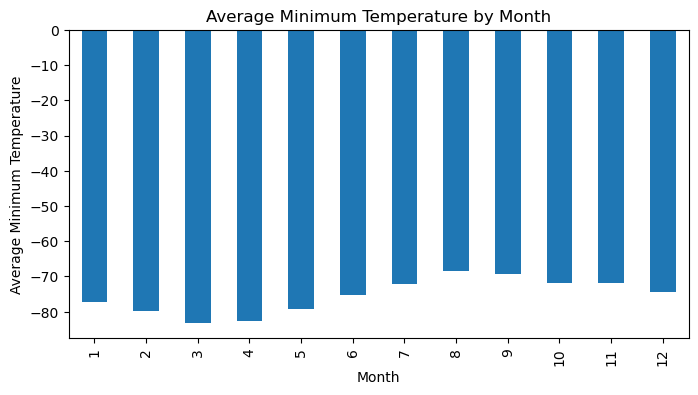

In [148]:
# Plot the average minimum temperature by month

# Create a bar plot
plt.figure(figsize=(8, 4))
# plt.bar(aver_min_temp.index, aver_min_temp.values, color='blue')

aver_min_temp.plot.bar()

# Add titles and labels
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature')
# plt.xticks() 

# Show the plot
plt.show()

<Axes: xlabel='month'>

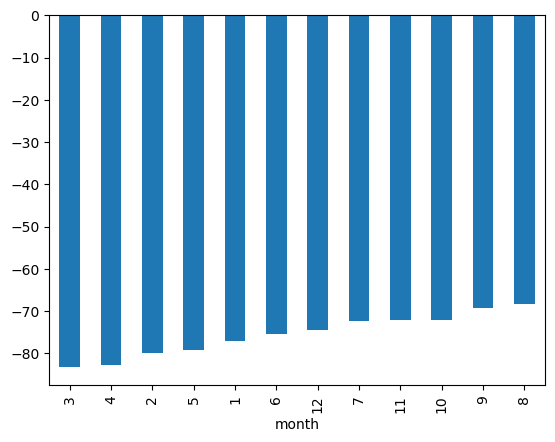

In [149]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Calculate the average minimum temperature by month
aver_min_temp = scrapped_df.groupby('month')['min_temp'].mean()

# Sort the average minimum temperature from coldest to hottest
aver_min_temp1 = aver_min_temp.sort_values()
aver_min_temp1.plot.bar()


In [150]:
aver_pressure = scrapped_df.groupby('month')['pressure'].mean()
print("Average Pressure by Month:")
print(aver_pressure)
# Plot the average pressure by month


Average Pressure by Month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


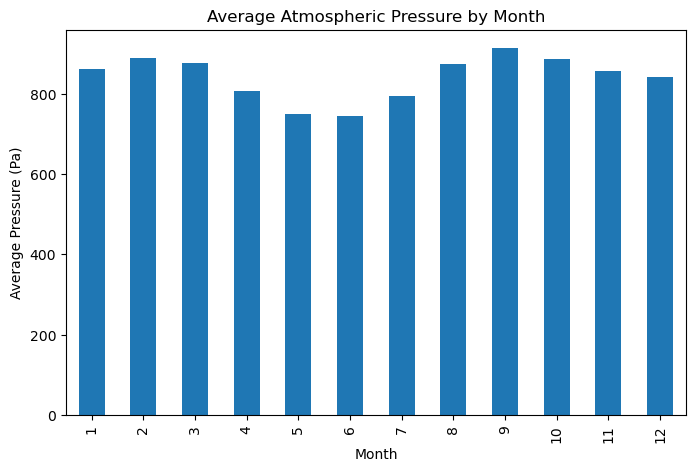

In [151]:
# Plot the average pressure by month
plt.figure(figsize=(8, 5))
# plt.bar(aver_pressure.index, aver_pressure.values, color='blue')

aver_pressure.plot.bar()

# Add titles and labels
plt.title('Average Atmospheric Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')  # Adjust the unit if necessary
# plt.xticks(aver_pressure.index)  # Ensure x-ticks are set to month indices

# Show the plot
plt.show()

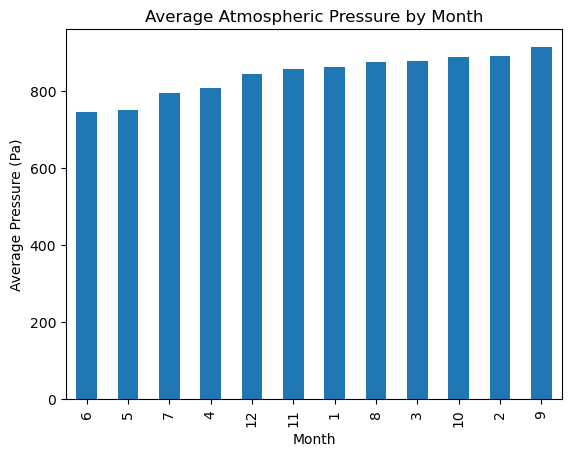

In [152]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

# Identify the lowest and highest pressure months
lowest_pressure_month = aver_pressure.idxmin()
highest_pressure_month = aver_pressure.idxmax()
lowest_pressure_value = aver_pressure.min()
highest_pressure_value = aver_pressure.max()

aver_pressure1 = aver_pressure.sort_values()
aver_pressure1.plot.bar()

# Add titles and labels
plt.title('Average Atmospheric Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')  # Adjust the unit if necessary
# plt.xticks(aver_pressure.index)  # Ensure x-ticks are set to month indices

# Show the plot
plt.show()

In [153]:
import numpy as np

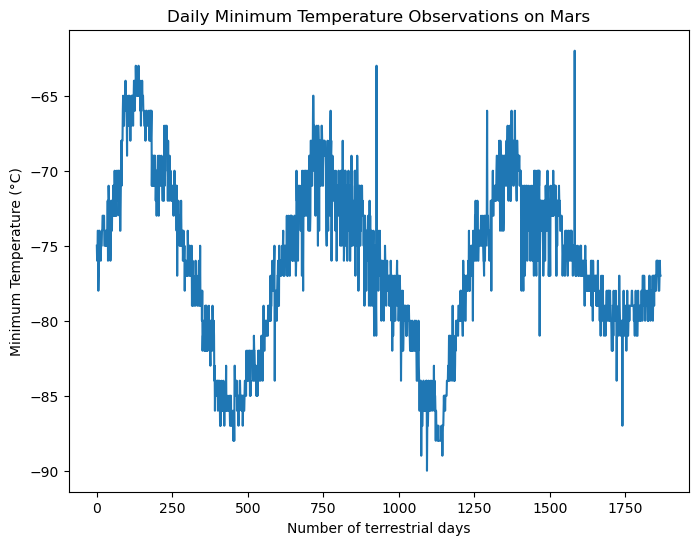

In [154]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

# Plot the daily minimum temperature observations
plt.figure(figsize=(8, 6))
daily_min_temp = scrapped_df["min_temp"]
daily_min_temp.plot()
# plt.plot(daily_min_temp.index, daily_min_temp.values, linestyle='-', color='blue')

# Add titles and labels
plt.title('Daily Minimum Temperature Observations on Mars')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum Temperature (°C)')  # Adjust the unit if necessary

# Show the plot
plt.show()

#### Minimum Temperature

We noticed that the minimum temperature as plotted in the bar chart was recorded in month 8 at -74 degrees

#### Atmospheric Pressure

The atmospheric pressure showed a minimum reading in month 6 and highest reading month 9

#### Year Length

The year length is 1875 number of terrestrial days showed on the readings displayed above.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [155]:
# Write the data to a CSV
scrapped_df.to_csv('output.csv', index=False)

In [156]:
browser.quit()